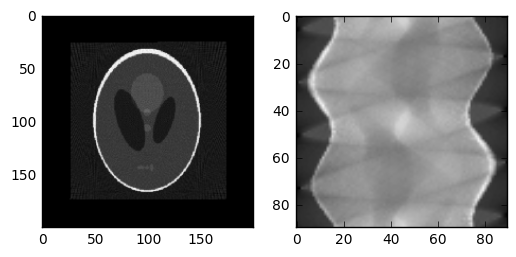

Oryginalny obraz:
(200, 200)
Stenogram:
(90, 90)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/imageio/core/util.py:78: UserWarning: Lossy conversion from float64 to uint8, range [0, 1]
  dtype_str, out_type.__name__))


Końcowy obraz bez filtracji sinogramu


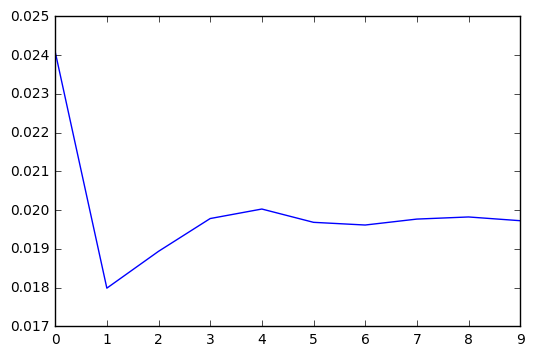

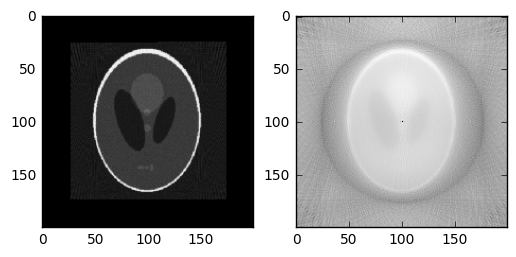

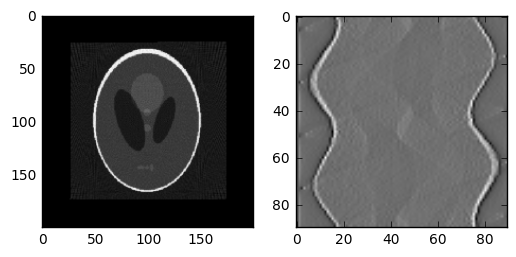

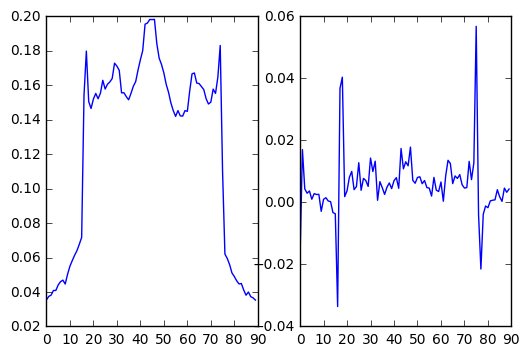

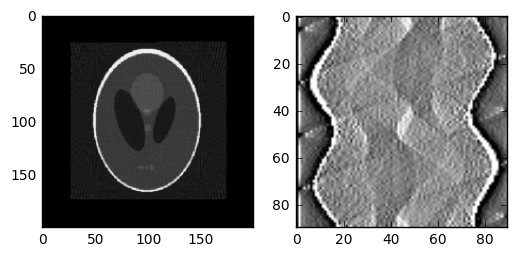

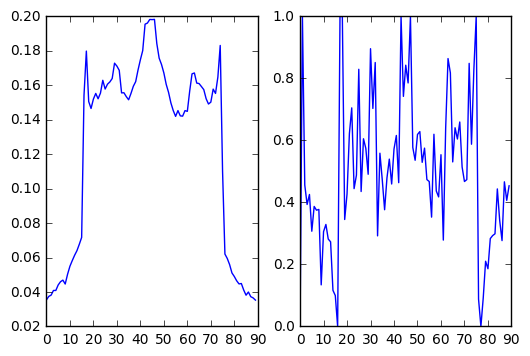

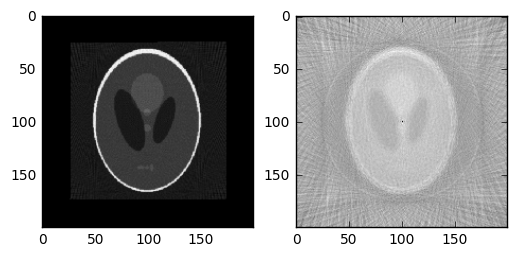

Końcowy obraz z filtracją sinogramu


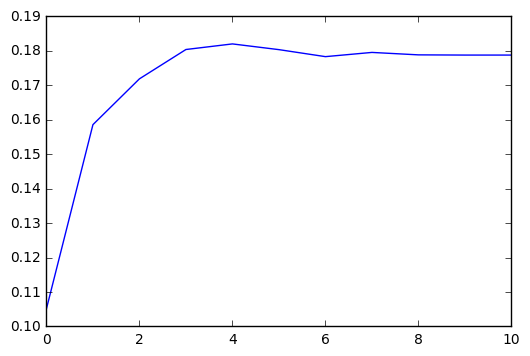

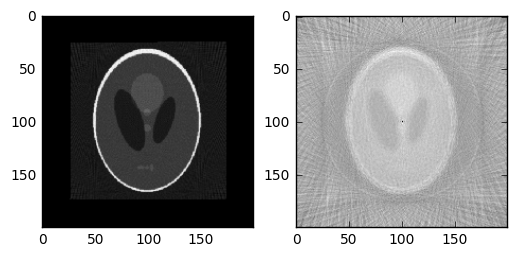

Błąd średniokwadratowy bez filtrowania:
0.0197288515301
Błąd średniokwadratowy z filtrowaniem:
0.178786220488


In [1]:
#!/usr/bin/python
import sys
import plikKrzysia
import plikAgi
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage import data, io
import dicom, dicom.UID
from dicom.dataelem import DataElement
from dicom.dataset import Dataset, FileDataset
import numpy as np
import datetime, time
import os.path
from sklearn.metrics import mean_squared_error


class Result:
    def __init__(self, picture=[]):
        self.raw = picture
        self.improved = picture


class Picture_struct:
    'Structure of our picture'
    oryginal = []
    sinogram = []
    filtered = []
    reconstructed = []
    result = Result()

    def __init__(self, picture_):
        self.oryginal = picture_

    def picture2sinogram(self):
        # Should return array [n][n] which is result of the function  .. from  plikKrzysia
        # lines n x n x 4 array of lines
        self.sinogram, self.lines = plikKrzysia.picture2sinogram(self.oryginal, width=90, detector_amount=90, alpha=4)
        fig, plots = plt.subplots(1, 2)
        plots[0].imshow(self.oryginal, cmap='gray')
        plots[1].imshow(self.sinogram, cmap='gray')
        plt.show()
        print("Oryginalny obraz:")
        print(np.shape(self.oryginal))
        print("Stenogram:")
        print(np.shape(self.sinogram))

        return self.sinogram

    def sinogram2picture(self):
        self.reconstructed = plikAgi.sinogram2picture(self.oryginal, self.sinogram, self.lines)
        fig, plots = plt.subplots(1, 2)
        print("Końcowy obraz bez filtracji sinogramu")
        plots[0].imshow(self.oryginal, cmap='gray')
        plots[1].imshow(self.reconstructed, cmap='gray')
        plt.show()
        #self.result.raw = plikAgi.sinogram2picture(self.sinogram)
        #self.result.improved = plikAgi.sinogram2picture(self.filtered)
        return self.result

    def filtering(self):
        self.filtered = plikAgi.filtered_sinogram2picture(self.oryginal, self.sinogram, self.lines)
        fig, plots = plt.subplots(1, 2)
        print("Końcowy obraz z filtracją sinogramu")
        plots[0].imshow(self.oryginal, cmap='gray')
        plots[1].imshow(self.filtered, cmap='gray')
        plt.show()
        return self.filtered
    
def mse(picture):
    print("Błąd średniokwadratowy bez filtrowania:")
    print(mean_squared_error(picture.oryginal, picture.reconstructed))
    print("Błąd średniokwadratowy z filtrowaniem:")
    print(mean_squared_error(picture.oryginal, picture.filtered))


def tomograf(picture_):
    picture = Picture_struct(picture_)
    picture.picture2sinogram()
    #TODO
    #    picture.filtered()
    picture.sinogram2picture()
    picture.filtering()
    return picture

if __name__ == "__main__":
    # if (len(sys.argv) != 2):
    #    print("This program requires a bitmap picture as an argument")
    # tomograf(sys.argv[1])

    #example1
    #picture = data.binary_blobs(length=80, blob_size_fraction=0.1, n_dim=2, volume_fraction=0.5, seed=None)
    picture = np.zeros([200,200])
    picture[24:174, 24:174] = rgb2gray(io.imread("tomograf-zdjecia/06.png"))
    
    #Example2
    #picture = data.moon()
    pic_object = tomograf(picture)
    mse(pic_object)

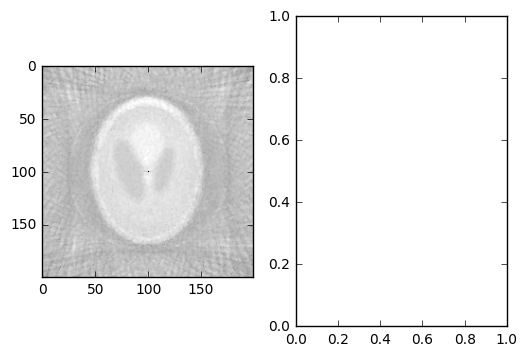

In [2]:

from skimage import img_as_float, img_as_ubyte, filters
#new = filters.gaussian_filter(pic_object.filtered, sigma=2)
import skimage.morphology as mp
new = mp.dilation(mp.erosion(pic_object.filtered))
fig, plots = plt.subplots(1, 2)
plots[0].imshow(new, cmap='gray')
plt.show()  
